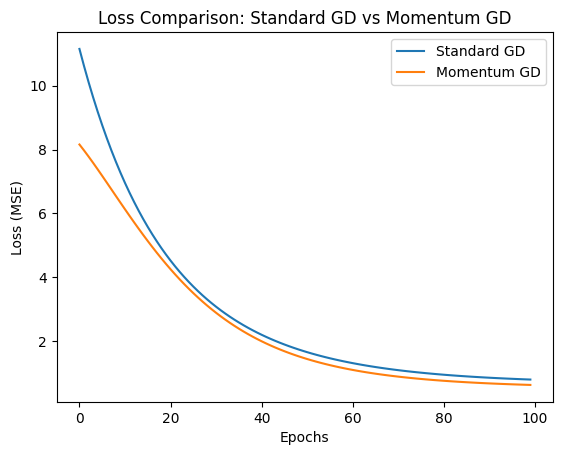

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

housing = fetch_california_housing()
X = housing.data
y = housing.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

n_features = X_train.shape[1]
weights = np.random.randn(n_features)
bias = 0
learning_rate = 0.01
epochs = 100
beta = 0.9
velocity = np.zeros(n_features)

def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

losses_momentum = []
losses_standard = []

weights_standard = np.random.randn(n_features)
bias_standard = 0

for epoch in range(epochs):
    y_pred_standard = X_train.dot(weights_standard) + bias_standard
    loss_standard = compute_mse(y_train, y_pred_standard)
    losses_standard.append(loss_standard)
    
    dL_dw_standard = -2 * X_train.T.dot(y_train - y_pred_standard) / len(y_train)
    dL_db_standard = -2 * np.sum(y_train - y_pred_standard) / len(y_train)
    
    weights_standard -= learning_rate * dL_dw_standard
    bias_standard -= learning_rate * dL_db_standard

    y_pred_momentum = X_train.dot(weights) + bias
    loss_momentum = compute_mse(y_train, y_pred_momentum)
    losses_momentum.append(loss_momentum)
    
    dL_dw_momentum = -2 * X_train.T.dot(y_train - y_pred_momentum) / len(y_train)
    dL_db_momentum = -2 * np.sum(y_train - y_pred_momentum) / len(y_train)
    
    velocity = beta * velocity + (1 - beta) * dL_dw_momentum
    weights -= learning_rate * velocity
    bias -= learning_rate * dL_db_momentum

plt.plot(range(epochs), losses_standard, label='Standard GD')
plt.plot(range(epochs), losses_momentum, label='Momentum GD')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Loss Comparison: Standard GD vs Momentum GD')
plt.legend()
plt.show()